# Phase 1: Exploratory Data Analysis (EDA)

## 1: Import Libraries

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

## 2: Loading Dataset

In [ ]:
uploaded = files.upload()

Saving hotel_bookings.csv to hotel_bookings (2).csv


In [ ]:
df = pd.read_csv('hotel_bookings.csv')

## 3: Take a look at the dataset

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## 4: Check for missing values

In [ ]:
print(df.isnull().sum())

# Found nulls in multiple columns(children, country, agent, company).

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

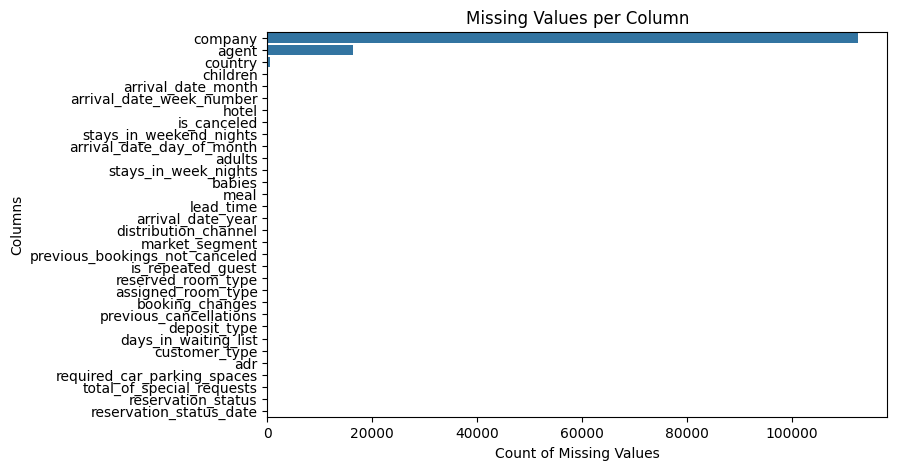

In [ ]:
# Sort columns descendingly by missing values count.
missing_counts = df.isnull().sum().sort_values(ascending = False)
# Plot a bar chart
plt.figure(figsize=(8, 5))
# Making the bars horizontal to be able to read columns' name.
sns.barplot(x=missing_counts.values, y=missing_counts.index)
plt.title("Missing Values per Column")
plt.xlabel("Count of Missing Values")
plt.ylabel("Columns")
plt.show()
# Since children column only has 4 missing values, its bar is too small to be visible.

## 5: Check for duplicates

In [ ]:
# Get duplicate rows count
df.duplicated().sum()

np.int64(31994)

In [ ]:
# Display duplicate rows
df[df.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


## 6: Detect Outliers

In [ ]:
# Get key numeric columns
numeric_cols = ["adr", "lead_time"]

# Function to calculate number of outliers for a column using IQR
def get_outliers_count(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Print column name and its outlier's count
for col in numeric_cols:
    outliers, lower_bound, upper_bound = get_outliers_count(df, col)
    print(f"Column: {col}")
    print(f"Number of outliers: {outliers.shape[0]}")
    print(f"lower_bound: {lower_bound}")
    print(f"upper_bound: {upper_bound}\n")


Column: adr
Number of outliers: 3793
lower_bound: -15.774999999999991
upper_bound: 211.065

Column: lead_time
Number of outliers: 3005
lower_bound: -195.0
upper_bound: 373.0



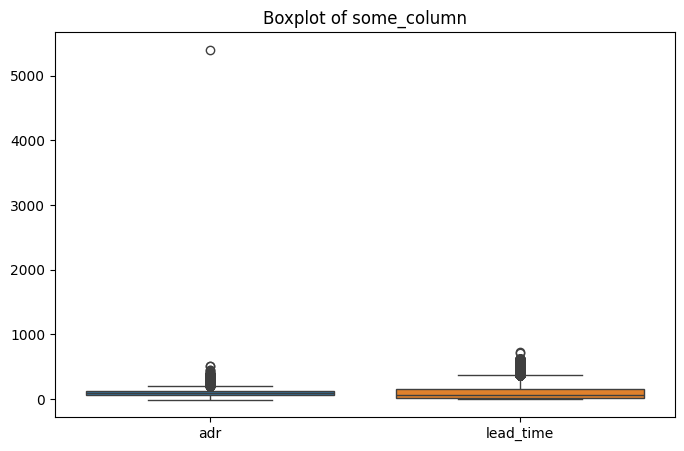

In [ ]:
# Plot the two columns to look at the outliers
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[["adr", "lead_time"]])
plt.title("Boxplot of some_column")
plt.show()

## 7: Document Findings

### Columns With Missing Data:
- `children`: 4 missing values  
- `country`: 488 missing values  
- `agent`: 16340 missing values  
- `company`: 112593 missing values

We will need to handle these column's missing values.



### Key Numeric Columns Outliers:
- `adr` 3793 outliers (with one value being extremely larger than the rest)
- `lead_time` 3005 outliers

We will need to handle these column's outliers.


### Duplicates:
 found 31994 duplicated rows that need to be removed.

# Phase 2: Data Cleaning

## 1: Handle Missing Values

In [ ]:
df['children'].fillna(df['children'].mean(), inplace=True)
df['country'].fillna(df['country'].mode()[0], inplace=True)
df['agent'].fillna(0, inplace=True)
df['company'].fillna(0, inplace=True)

# df['children'].fillna(df['children'].median(), inplace=True)
# df['country'].fillna('Unknown', inplace=True)
# df['agent'].fillna('None', inplace=True)
# df['company'].fillna('None', inplace=True)

/tmp/ipython-input-2310711826.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['children'].fillna(df['children'].mean(), inplace=True)
/tmp/ipython-input-2310711826.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [ ]:
# Make sure there is no more missing values
print(df.isnull().sum().sum())

0


## 2: Remove Duplicates

In [ ]:
# resetting index
df = df.drop_duplicates().reset_index(drop=True)

In [ ]:
# Make sure there is no more duplicated rows
df.duplicated().sum()

np.int64(0)

## 3: Handle Outliers

In [ ]:
# Removing extreme outlier for adr
df["adr"] = df["adr"].clip(upper=1000)

# found that Lead_time for more than a year is unrealistic and  rare
df["lead_time"] = df["lead_time"].clip(upper=365)

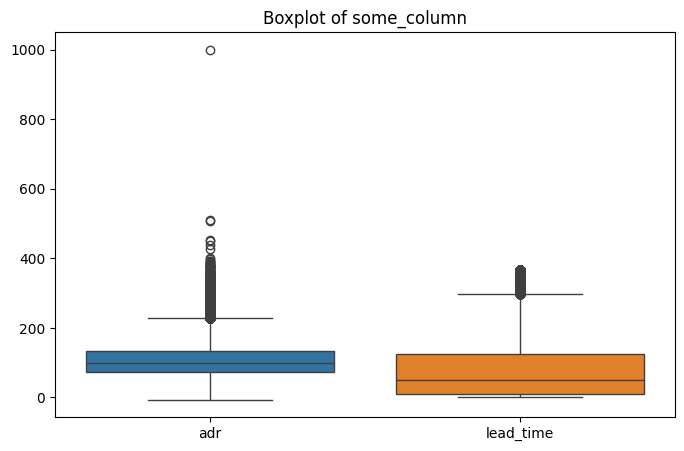

In [ ]:
# Plotting the two columns again to look at the change
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[["adr", "lead_time"]])
plt.title("Boxplot of some_column")
plt.show()

## 4: Fix DataTypes

In [20]:
# Convert all objects to strings then change reservation_status_date to date time
df = df.astype({col: "string" for col in df.select_dtypes(include="object").columns})
df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"], errors="coerce")

# Convert children, agent and company to integer since they cant be decimal
df["children"] = df["children"].astype(int)
df["agent"] = df["agent"].astype(int)
df["company"] = df["company"].astype(int)

# Convert is_canceled and is_repeated_guest to bool
df["is_canceled"] = df["is_canceled"].astype(bool)
df["is_repeated_guest"] = df["is_repeated_guest"].astype(bool)

In [21]:
# Check on datatypes now
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87377 entries, 0 to 87376
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87377 non-null  string        
 1   is_canceled                     87377 non-null  bool          
 2   lead_time                       87377 non-null  int64         
 3   arrival_date_year               87377 non-null  int64         
 4   arrival_date_month              87377 non-null  string        
 5   arrival_date_week_number        87377 non-null  int64         
 6   arrival_date_day_of_month       87377 non-null  int64         
 7   stays_in_weekend_nights         87377 non-null  int64         
 8   stays_in_week_nights            87377 non-null  int64         
 9   adults                          87377 non-null  int64         
 10  children                        87377 non-null  int64         
 11  ba